# Lab 2 Report: 
## Iris Classification with Regression

### Name:

In [1]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

In [2]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [3]:
Image('lab2_exercise1.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

<IPython.core.display.Image object>

## Prepare Data

In [4]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
Y_train = iris['target']
print(Y_train.shape)
print(X_train.shape)

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Feel free to perform additional data processing here (e.g. standard scaling)

(150,)
(150, 4)


In [5]:
# Print the first 10 training samples for both features and targets

print(X_train[:10, :], Y_train[:10]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]


In [6]:
# Print the dimensions of features and targets

print(X_train.shape, Y_train.shape)

(150, 4) (150,)


In [7]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


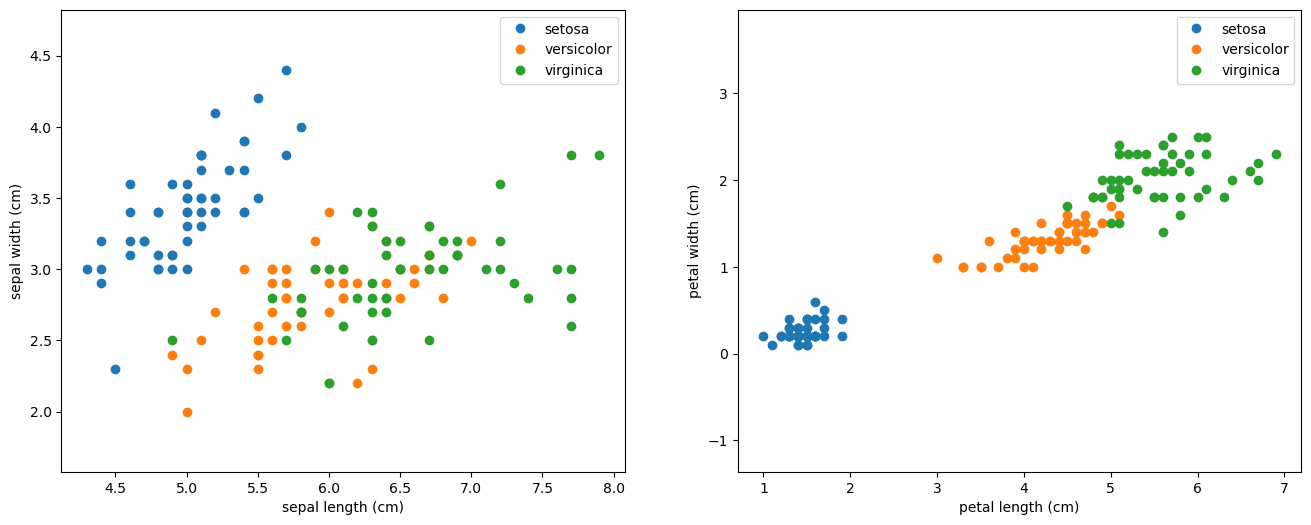

In [8]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):
    
    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[Y_train == target]
    
    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):
    
    X_plot = X_train[Y_train == target]
    
    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
    
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

## Define Model

In [9]:
class irisClassification(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim):
        
        super(irisClassification, self).__init__()
        
        self.layer1 = torch.nn.Linear(input_dim, output_dim)
        self.layer2 = torch.nn.Linear(output_dim, 1)
        
    def forward(self, x):
        
        x = self.layer1(x)
        out = self.layer2(x)
        # out = self.layer1(x)
        
        return out

## Define Hyperparameters

In [10]:
# model = irisClassification(input_dim = 2, output_dim = 1)
model = irisClassification(input_dim = 4, output_dim = 5)

# learning_rate = 0.03
learning_rate = 0.02
epochs  = 30

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Identify Tracked Values

In [11]:
# follow models performance over each epoch. Identify a metric and track it over epochs

# YOUR CODE HERE
train_loss_list = []

## Train Model

In [12]:
# x_train = torch.from_numpy(X_train[:, 2:]).float()
x_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(Y_train).float()
y_train = y_train.unsqueeze(1)
print(x_train.shape)
print(y_train.shape)
# m = torch.nn.LogSoftmax(dim=1)
# print(m(x_train))

for epoch in range(epochs):
    
    # YOUR CODE HERE
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = loss_func(outputs, y_train)
    train_loss_list.append(loss.item())
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

torch.Size([150, 4])
torch.Size([150, 1])
epoch 0, loss 9.004416465759277
epoch 1, loss 4.892210960388184
epoch 2, loss 0.9273966550827026
epoch 3, loss 0.5296241641044617
epoch 4, loss 0.2526034116744995
epoch 5, loss 0.1364825814962387
epoch 6, loss 0.10744013637304306
epoch 7, loss 0.09865686297416687
epoch 8, loss 0.09277988970279694
epoch 9, loss 0.08778615295886993
epoch 10, loss 0.08345817774534225
epoch 11, loss 0.07971159368753433
epoch 12, loss 0.07647599279880524
epoch 13, loss 0.07368817925453186
epoch 14, loss 0.07129131257534027
epoch 15, loss 0.0692346841096878
epoch 16, loss 0.06747312843799591
epoch 17, loss 0.0659666359424591
epoch 18, loss 0.06467996537685394
epoch 19, loss 0.06358219683170319
epoch 20, loss 0.06264628469944
epoch 21, loss 0.061848703771829605
epoch 22, loss 0.06116906553506851
epoch 23, loss 0.0605897456407547
epoch 24, loss 0.06009558215737343
epoch 25, loss 0.05967356264591217
epoch 26, loss 0.059312548488378525
epoch 27, loss 0.05900302156805992


## Visualize and Evaluate Model

Text(0, 0.5, 'Loss')

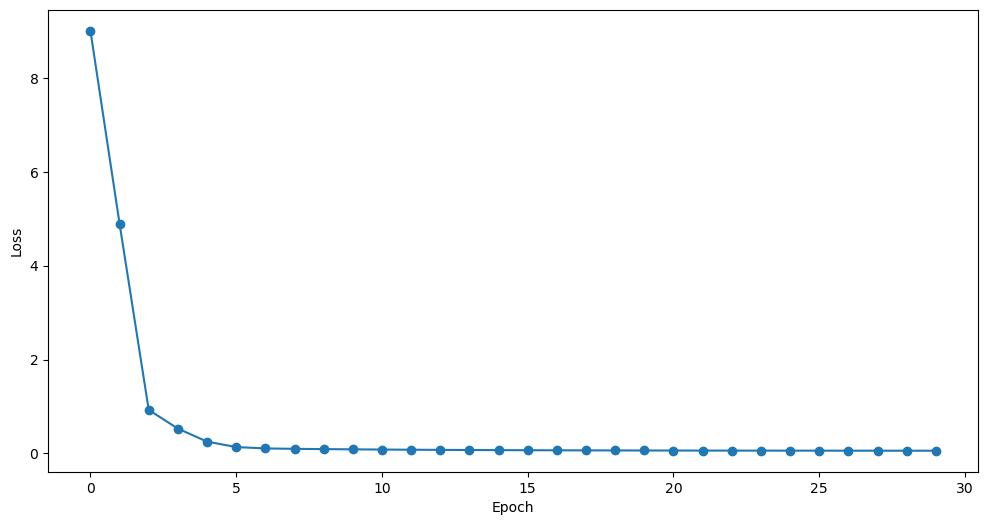

In [13]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot

plt.figure(figsize=(12, 6))

# YOUR CODE HERE
plt.plot(train_loss_list, '-', marker = 'o', label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Training accuracy: 
['Setosa' 'Versicolor' 'Virginica' 'Total']
[0.33333333 0.31333333 0.31333333 0.96      ]
Training accuracy:  [0.96]


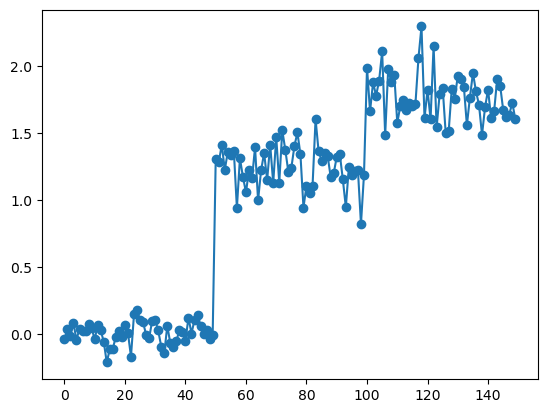

In [44]:
# Confirm that your model's training accuracy is >90%

with torch.no_grad():
    
    # Compare your model predictions with targets (y_train) to compute the training accuracy     
    # YOUR CODE HERE
    predicted = model(x_train).numpy()
        
# Training accuracy = (# of correct predictions) / (total # of training samples)
# You can round the model predictions to integer (e.g. 0.34 -> 0, 1.78 -> 2)

# YOUR CODE HERE
# print(Y_train)
# print(predicted, predicted.shape)
correct = np.array([0, 0, 0, 0])
for i in range(len(Y_train)):
    preValue = predicted[i][0].round()
    if preValue == y_train[i]: 
        correct[3] += 1.
        if i < 50: correct[0] += 1. # setosa
        if i >= 50 and i < 100: correct[1] += 1. # versicolor
        if i >= 100: correct[2] += 1. # virginica
accuracy = correct / len(Y_train)
plt.plot(predicted, '-', marker = 'o', label = 'Predicted')
name = np.array(['Setosa', 'Versicolor', 'Virginica', 'Total'])
# print("Training accuracy: ", accuracy)
print("Training accuracy: ")
print(name)
print(accuracy)

round_predicted = np.round(predicted)
# count = sum(1 for x, y in zip(Y_train, round_predicted) if x == y)
# count = sum(Y_train == round_predicted)
count = sum(y_train.numpy() == round_predicted)
print("Training accuracy: ", count/len(Y_train))